##Association Rule Mining
The aim of this lab is to explore **Association Rule Mining**. We will use several transaction records to determine the Association or, effective associations among the items purchased by the customers. We can consider that the associations/relations we determine, will help the business organization we are working for. This business organization should then be able to set and implement item display layout more effectively for their shop.

##Libraries Used
The libraries we will use here are:


*   NumPy
*   Pandas
*   Matplotlib
*   Seaborn
*   Transaction Encoder
*   Apriori,Association Rules

Let's first import the useful libraries 







In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', None)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#The Dataset
We will now import the dataset. Assume, the business organization currently wants us to analyse the dataset that contains their Day One transactions in **Market_Basket_DayOneTransaction.csv** file. So, let's import the file!

In [2]:
market_basket_df = pd.read_csv('./Market_Basket_DayOneTransactions.csv', header=None)
market_basket_df.head()
#market_basket_df.shape

FileNotFoundError: ignored

We will extract the items of each transaction in a list. Any NULL values are represented as NaN in pandas dataframe, so, we will exclude the "NaN"s in our list.

In [ ]:
basket_items = []
for index, row in market_basket_df.iterrows():
   cleansed_items = [item for item in row if str(item)!='nan']
   basket_items.append(cleansed_items)
basket_items

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

We will now use Transaction Encoder to load the listed items in a dataframe.

In [ ]:
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(basket_items).transform(basket_items)
transaction_df = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
#transaction_df.shape
transaction_df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Before we go to find the associations between the items, we now need to first see the frequency of each item in the dataset distinctly. In order to see which items are bought most frequently, we will also sort this list in the decreasing order of their items' frequencies.

In [ ]:
item_count = {}
for col in transaction_df.columns:
    item_count[col] = transaction_df[col].sum()
item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df.shape, item_freq_df.head(20)

((120, 1),                    frequency
 mineral water            738
 eggs                     573
 spaghetti                561
 french fries             541
 chocolate                536
 green tea                445
 milk                     412
 ground beef              288
 pancakes                 288
 frozen vegetables        285
 cake                     271
 burgers                  266
 cookies                  254
 escalope                 245
 shrimp                   238
 low fat yogurt           227
 olive oil                217
 tomatoes                 215
 frozen smoothie          204
 turkey                   201)

For better understanding, we may even plot the items on a graph to visually check the frequencies of them.

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text major ticklabel objects>)

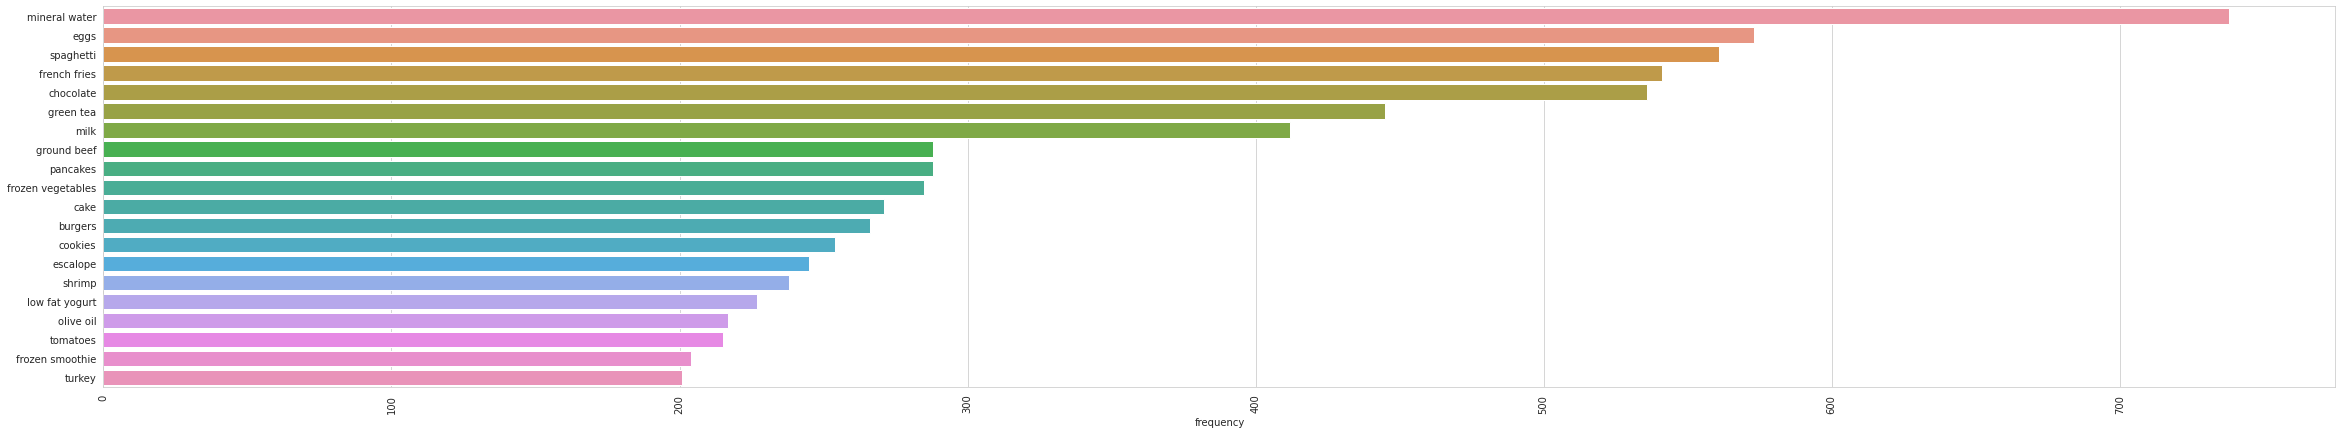

In [ ]:
plt.figure(figsize=(40,7))
sns.barplot(y=item_freq_df.index[:20], x=item_freq_df.frequency[:20])
plt.xticks(rotation=90)

Now for each itemset, we will estimate the support. Remember, the support threshold is something that we decide about. Here, We have taken support threshold as 10%.

In [ ]:
apriori(transaction_df, min_support=0.1, use_colnames=True)

,support,itemsets
0,0.172903,(chocolate)
1,0.184839,(eggs)
2,0.174516,(french fries)
3,0.143548,(green tea)
4,0.132903,(milk)
5,0.238065,(mineral water)
6,0.180968,(spaghetti)


Our store has 120 items but using 10% as Support Threshold means we are looking at 7 elements in the above code cell that are present in atleast 310 transactions out of the 3100 transacions in the dataset. The store owner wants to increase their profit and one way of doing that will be to know how to better sell most of the 120 items that are sold by the store. 

This can be done by asssuring greater number of items being picked up by the Apriori algorithm. This can be done by lowering the Support Threshold so that we get more number of association rules for a good proportion of the 120 items the store sells.  

We can check how many items are there in different range of frequencies. Knowing this will help us to decide about the support as well as confidence threshold percentages that will make proper business sense.

In [ ]:
print(f'freq>200: {item_freq_df[item_freq_df.frequency>200].shape[0]} items')
print(f'freq>100: {item_freq_df[item_freq_df.frequency>100].shape[0]} items')
print(f'freq>50: {item_freq_df[item_freq_df.frequency>50].shape[0]} items')

freq>200: 20 items
freq>100: 33 items
freq>50: 62 items


So, we can assume that if the frquency limit is between 50 and 100, we should get around 50 items, which will cover nearly half the collection of items in the store. This can be achieved by setting the Support Threshold to 3%.

In [ ]:
freq_itemset_support = apriori(transaction_df, min_support=0.03, use_colnames=True)
freq_itemset_support

,support,itemsets
0,0.037097,(avocado)
1,0.033226,(brownies)
2,0.085806,(burgers)
3,0.087419,(cake)
4,0.047419,(champagne)
5,0.063548,(chicken)
6,0.172903,(chocolate)
7,0.081935,(cookies)
8,0.055806,(cooking oil)
9,0.184839,(eggs)


Let's estimate the confidence for the rules that we have generated now. Again, this decision is motivated in light of business aspects and also based on the dataset at hand. This is such a dataset where the **variability** of the transactions is high, meaning that there are very few associations between items from different transactions, hence, we cannot be very certain about the quality of our association rules for this dataset as any Confidence Threshold above 44% will not produce any rules at all.

In such scenarios, it is preferred to have a considerably large number of rules that covers as many of the items in the store as possible and that can be achieved by reducing the Cnfidence Threshold to a resonable amount, in our case, we have taken it as 20%.

You already know about the Support, Confidence, Lift as Measuring metrics that we used for determining the Association Rules. However, Leverage and Conviction are other metrics that you can explore further later.

In [ ]:
overal_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.20)
overal_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cake),(mineral water),0.087419,0.238065,0.030323,0.346863,1.457015,0.009511,1.166579
1,(chocolate),(eggs),0.172903,0.184839,0.036129,0.208955,1.130473,0.004170,1.030487
2,(french fries),(chocolate),0.174516,0.172903,0.035484,0.203327,1.175959,0.005309,1.038189
3,(chocolate),(french fries),0.172903,0.174516,0.035484,0.205224,1.175959,0.005309,1.038637
4,(milk),(chocolate),0.132903,0.172903,0.036129,0.271845,1.572236,0.013150,1.135880
5,(chocolate),(milk),0.172903,0.132903,0.036129,0.208955,1.572236,0.013150,1.096141
6,(mineral water),(chocolate),0.238065,0.172903,0.055161,0.231707,1.340098,0.013999,1.076539
7,(chocolate),(mineral water),0.172903,0.238065,0.055161,0.319030,1.340098,0.013999,1.118897
8,(spaghetti),(chocolate),0.180968,0.172903,0.044194,0.244207,1.412390,0.012904,1.094343
9,(chocolate),(spaghetti),0.172903,0.180968,0.044194,0.255597,1.412390,0.012904,1.100254


#Question:1
Determine the rule set(s) for the "DayTwo" Transactions. You are advised to check and adjust the threshold values you select for both Support and Confidence to determine the maximum possible Rules/Rulesets.

In [ ]:
market_basket_df = pd.read_csv('./Market_Basket_DayTwoTransactions.csv', header=None)
market_basket_df.head(21)
#market_basket_df.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,soup,butter,cider,rice,pet food,french fries,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole wheat rice,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pancakes,white wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,french fries,yogurt cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chocolate,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,grated cheese,spaghetti,mineral water,pancakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,burgers,black tea,bacon,muffins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,chocolate,frozen smoothie,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,shrimp,mineral water,brownies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
